In [1]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

som = MiniSom(30, 30, 64, # initialization of 30x30 SOM with 64 features
              sigma=4, 
              learning_rate=0.5, 
              neighborhood_function='triangle')

som.pca_weights_init(data)
som.train(data, 5000, random_order=True, verbose=True)  # random training

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.0147226930808473


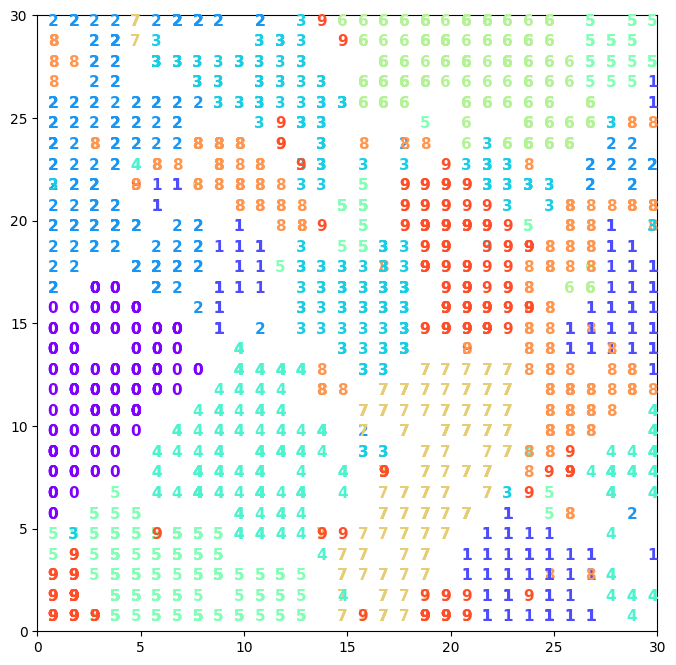

In [3]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)  # the node that the data point maps to
    wmap[w] = im
    plt.text(
        w[0]+.5,  w[1]+.5,  # location
        str(t),  # label
        color=plt.cm.rainbow(t / 10.), 
        fontdict={'weight': 'bold',  'size': 11})
    
    im = im + 1
    
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
# plt.savefig('resulting_images/som_digts.png')
plt.show()

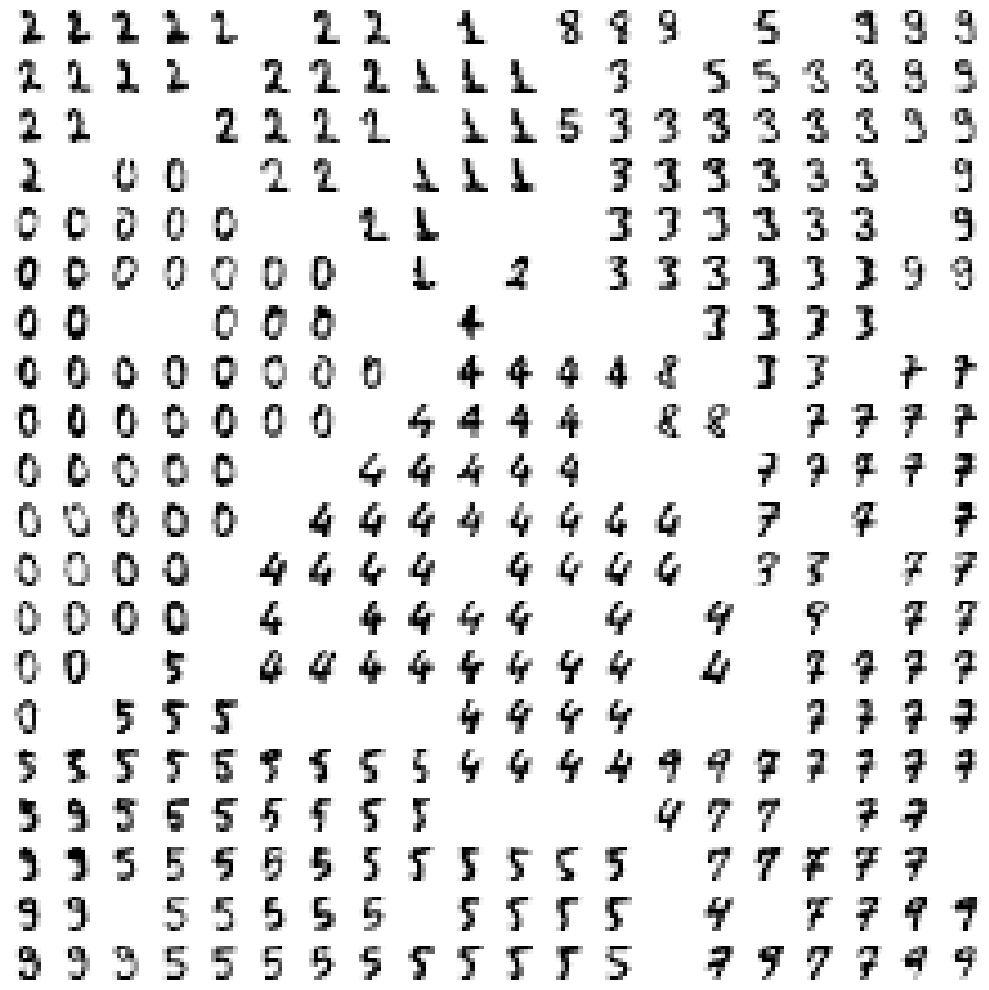

In [4]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
# plt.savefig('resulting_images/som_digts_imgs.png')
plt.show()